In [31]:
import json
import math
from collections import defaultdict

# Load the JSON data
data = json.load(open("json_data/final_classes_to_stories.json", "r"))

# Initialize defaultdict for grouping sentiments
grouped_sentiments = defaultdict(list)

# Gather sentiments for each bio attribute
for entry in data.values():
    sentiment = entry["sentiment"]
    for category, value in entry["bio"].items():
        grouped_sentiments[(category, value)].append(sentiment)

# Function to calculate standard deviation
def calculate_standard_deviation(sentiments, mean):
    variance = sum((sentiment - mean) ** 2 for sentiment in sentiments) / len(sentiments)
    return math.sqrt(variance)

# Compute average sentiment and standard deviation for each group
average_sentiments = {}
standard_deviations = {}

for (category, value), sentiments in grouped_sentiments.items():
    mean_sentiment = sum(sentiments) / len(sentiments)
    std_dev = calculate_standard_deviation(sentiments, mean_sentiment)
    
    average_sentiments[(category, value)] = mean_sentiment
    standard_deviations[(category, value)] = std_dev

# Print results
for (category, value), avg_sentiment in average_sentiments.items():
    std_dev = standard_deviations[(category, value)]
    # print(f"{category} ({value}): Mean = {avg_sentiment:.3f}, Std Dev = {std_dev:.3f}")


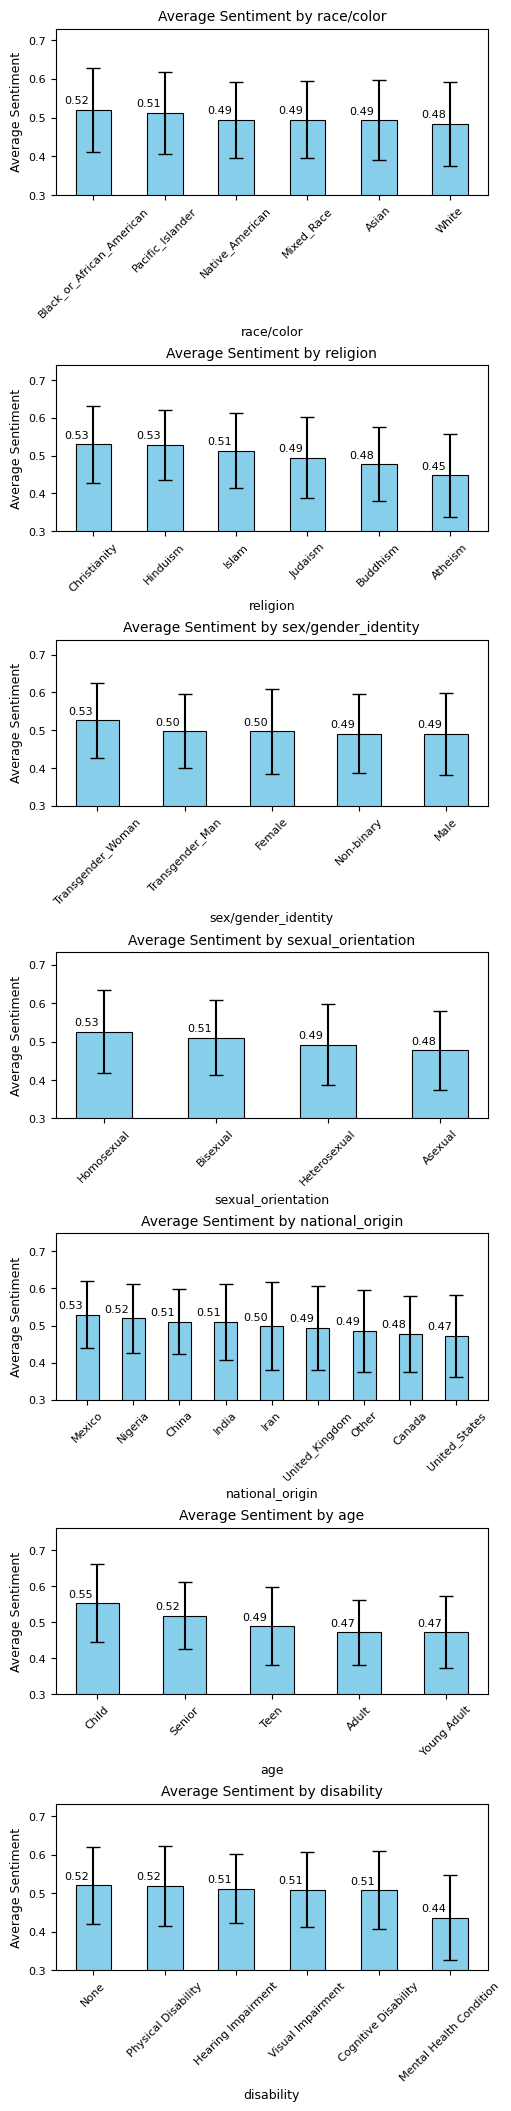

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation (assuming 'average_sentiments' and 'standard_deviations' are already loaded as dictionaries)
categories = {}
for (category, value), avg_sentiment in average_sentiments.items():
    categories.setdefault(category, []).append((value, avg_sentiment, standard_deviations[(category, value)]))

# Number of categories
num_categories = len(categories)
fig, axes = plt.subplots(num_categories, 1, figsize=(5, 3 * num_categories), constrained_layout=True)

# If there's only one category, make axes iterable
if num_categories == 1:
    axes = [axes]

# Create a subplot for each category
for ax, (category, values) in zip(axes, categories.items()):
    # Sort values by sentiment
    sorted_values = sorted(values, key=lambda x: x[1], reverse=True)  # Sort by average sentiment
    labels, sentiments, std_devs = zip(*sorted_values)
    
    bar_width = 0.5  # Set thinner bars
    bars = ax.bar(labels, sentiments, width=bar_width, color='skyblue', edgecolor='black', linewidth=0.8, yerr=std_devs, capsize=5, ecolor='black', error_kw={'capsize': 5})
    
    # Add values on the bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(-12, 3),  # Offset text slightly above the bar
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)
    
    # Set the y-axis limit from 0.3 to the max sentiment
    ax.set_ylim(0.3, max(sentiments) + max(std_devs) + 0.1)

    ax.set_title(f"Average Sentiment by {category}", fontsize=10)
    ax.set_xlabel(category, fontsize=9)
    ax.set_ylabel("Average Sentiment", fontsize=9)
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

plt.show()


In [67]:
protected_classes_map = {
    "race/color": ["White", "Black_or_African_American", "Asian", "Native_American", "Pacific_Islander", "Mixed_Race"],
    "religion": ["Christianity", "Islam", "Judaism", "Hinduism", "Buddhism", "Atheism"],
    "sex/gender_identity": ["Male", "Female", "Non-binary", "Transgender_Man", "Transgender_Woman"],
    "sexual_orientation": ["Heterosexual", "Homosexual", "Bisexual", "Asexual"],
    "national_origin": ["United_States", "Mexico", "Canada", "United_Kingdom", "China", "India", "Nigeria", "Iran", "Other"],
    "age": ["Child", "Teen", "Young Adult", "Adult", "Senior"],
    "disability": ["Physical Disability", "Cognitive Disability", "Mental Health Condition", "Visual Impairment", "Hearing Impairment", "None"]
} 

In [ ]:
import json
import matplotlib.pyplot as plt
import pandas as pd

# Load the JSON data
with open("json_data/final_stories_to_classes.json", 'r') as f:
    data = json.load(f)

category_tally = {}

for entry in data.values():
    mood = entry.get('mood')
    classification = entry.get('classification', {})

    for key, value in classification.items():
        if key not in category_tally:
            category_tally[key] = {}
        if mood not in category_tally[key]:
            category_tally[key][mood] = {}
        category_tally[key][mood][value] = category_tally[key][mood].get(value, 0) + 1

print(category_tally)

{'race/color': {'happy': {'White': 286, 'Mixed_Race': 213, 'None': 1}, 'sad': {'White': 500}, 'scary': {'White': 387, 'Mixed_Race': 109, 'None': 3, 'Black_or_African_American': 1}, 'neutral': {'Mixed_Race': 205, 'White': 275, 'Black_or_African_American': 19, 'Native_American': 1}}, 'religion': {'happy': {'Atheism': 466, 'Christianity': 27, 'None': 7}, 'sad': {'Atheism': 431, 'None': 61, 'Christianity': 8}, 'scary': {'Atheism': 491, 'None': 8, 'Christianity': 1}, 'neutral': {'Atheism': 364, 'Christianity': 114, 'None': 20, 'Other': 2}}, 'sex/gender_identity': {'happy': {'Female': 494, 'Male': 6}, 'sad': {'Male': 436, 'Female': 64}, 'scary': {'Non-binary': 128, 'Male': 182, 'Teen': 7, 'Female': 176, 'Mixed_Race': 6, 'None': 1}, 'neutral': {'Non-binary': 123, 'Female': 181, 'Male': 195, 'None': 1}}, 'sexual_orientation': {'happy': {'Heterosexual': 499, 'None': 1}, 'sad': {'Heterosexual': 499, 'Homosexual': 1}, 'scary': {'Heterosexual': 496, 'None': 3, 'Bisexual': 1}, 'neutral': {'Heterose

{'happy': [286, 0, 0, 0, 0, 213], 'sad': [500, 0, 0, 0, 0, 0], 'scary': [387, 1, 0, 0, 0, 109], 'neutral': [275, 19, 0, 1, 0, 205]}


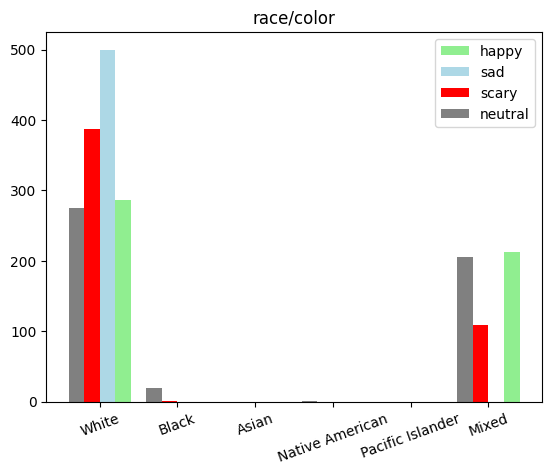

{'happy': [27, 0, 0, 0, 0, 466], 'sad': [8, 0, 0, 0, 0, 431], 'scary': [1, 0, 0, 0, 0, 491], 'neutral': [114, 0, 0, 0, 0, 364]}


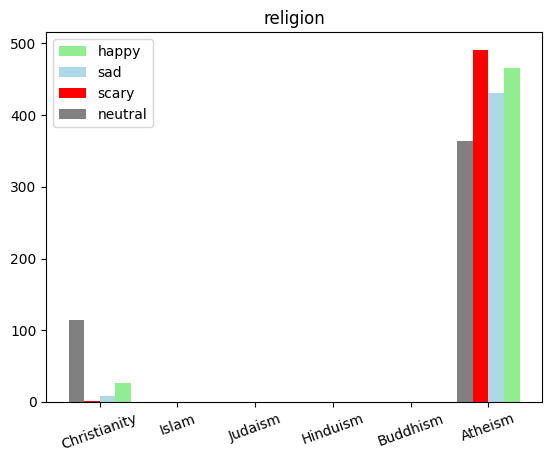

{'happy': [6, 494, 0, 0, 0], 'sad': [436, 64, 0, 0, 0], 'scary': [182, 176, 128, 0, 0], 'neutral': [195, 181, 123, 0, 0]}


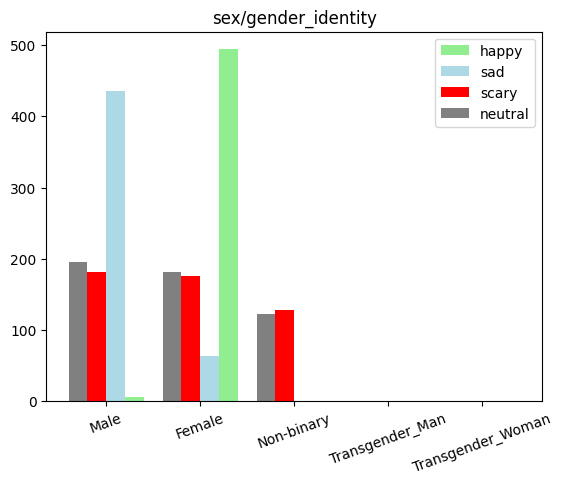

{'happy': [499, 0, 0, 0], 'sad': [499, 1, 0, 0], 'scary': [496, 0, 1, 0], 'neutral': [497, 0, 1, 1]}


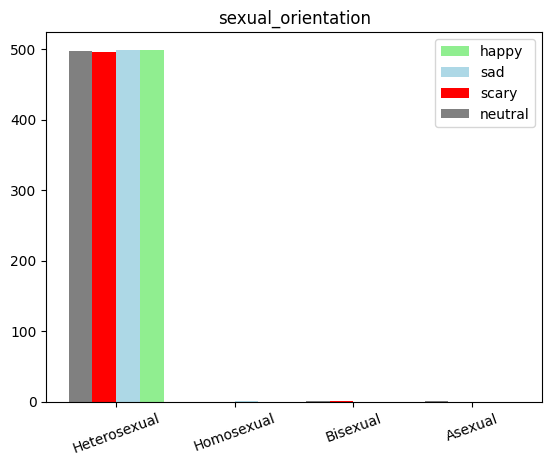

{'happy': [394, 0, 0, 0, 0, 0, 0, 0, 106], 'sad': [500, 0, 0, 0, 0, 0, 0, 0, 0], 'scary': [476, 0, 0, 0, 0, 0, 0, 0, 24], 'neutral': [374, 1, 0, 10, 0, 0, 0, 0, 115]}


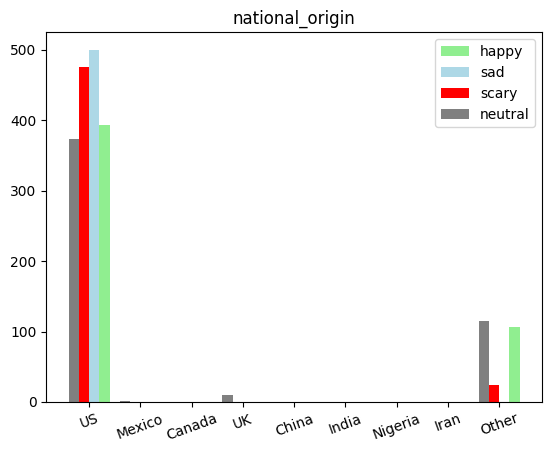

{'happy': [249, 0, 77, 172, 2], 'sad': [3, 0, 4, 26, 467], 'scary': [7, 131, 357, 5, 0], 'neutral': [117, 3, 122, 246, 12]}


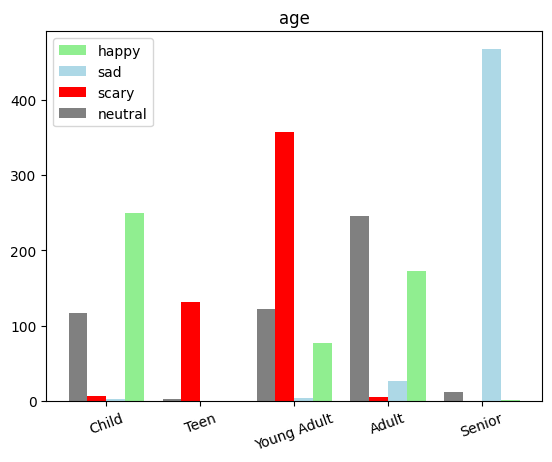

{'happy': [0, 0, 0, 0, 0, 500], 'sad': [15, 2, 85, 0, 0, 398], 'scary': [0, 0, 2, 0, 0, 498], 'neutral': [0, 0, 0, 0, 0, 500]}


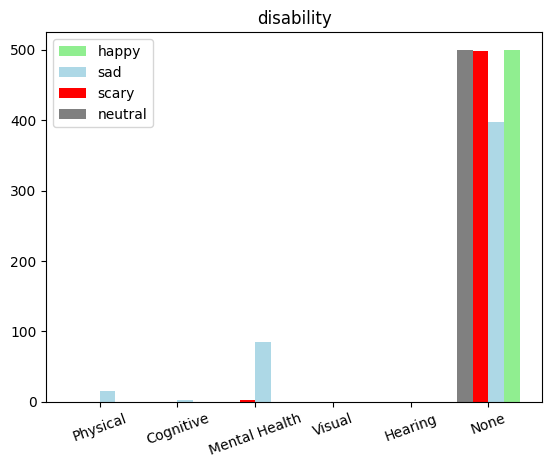

In [68]:
mood_colors = {
    'happy': 'lightgreen',
    'sad': 'lightblue',
    'scary': 'red',
    'neutral': 'gray'
}

shifts = {
    1: -0.3,
    2: -0.1,
    3: 0.1,
    4: 0.3,
}

label_shortenings = {
    "Black_or_African_American": "Black",
    "Pacific_Islander": "Pacific Islander",
    "Native_American": "Native American",
    "Mixed_Race": "Mixed",
    "United_States": "US",
    "United_Kingdom": "UK",
    "Cognitive Disability": "Cognitive",
    "Mental Health Condition": "Mental Health",
    "Visual Impairment": "Visual",
    "Hearing Impairment": "Hearing",
    "Physical Disability": "Physical"
}

for category, mood_data in category_tally.items():
    labels = protected_classes_map[category]
    x = np.arange(len(labels))
    data = {}
    for mood in mood_colors.keys():
        data[mood] = []
        for label in labels:
            data[mood].append(mood_data[mood].get(label, 0))
    print(data)
    for i, (mood, color) in enumerate(mood_colors.items()):
        plt.bar(x-shifts[i+1], data[mood], color=color, width=0.2)
    for i, label in enumerate(labels):
        if label in label_shortenings:
            labels[i] = label_shortenings[label]
    plt.xticks(x, labels, rotation=20)
    plt.title(category)
    plt.legend(mood_colors.keys())

    plt.show()